# Homework Final

In [1]:
source("./database.R")
source("./getdata.R")
source("./getstats.R")
source("./pred.R")

Warning message:
"程辑包'dplyr'是用R版本4.1.2 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"程辑包'latex2exp'是用R版本4.1.3 来建造的"


In [2]:
inst = "GE"
syms = c("GEH1","GEM1","GEU1","GEZ1","GEH2","GEM2","GEU2","GEZ2")
syms.str = paste0(paste0('"',syms,'"'),collapse=";")
ge.info = h("select from instinfo where inst=`GE")
tick.size = ge.info$minpxincr * ge.info$dispfactor

In [ ]:
tick.size

In [3]:
dates.all = h("select date from trade") %>% format(.,"%Y.%m.%d")
dates.all = as.vector(dates.all$date)

In [4]:
q1 = sprintf('select sumsiz:sum siz 
              by sym 
              from trade 
              where any sym like/: (%s),
                        date within (2020.10.05,2020.10.30)',syms.str)
trade.vols = h(q1)
trade.vols

sym,sumsiz
<chr>,<int>
GEH1,582681
GEH2,881320
GEM1,641851
GEM2,694038
GEU1,784911
GEU2,619810
GEZ1,856118
GEZ2,679395


In [6]:
dsec = 60
pmids= get.pmids.rearrange(dates.all[1:3],syms,dsec=dsec)

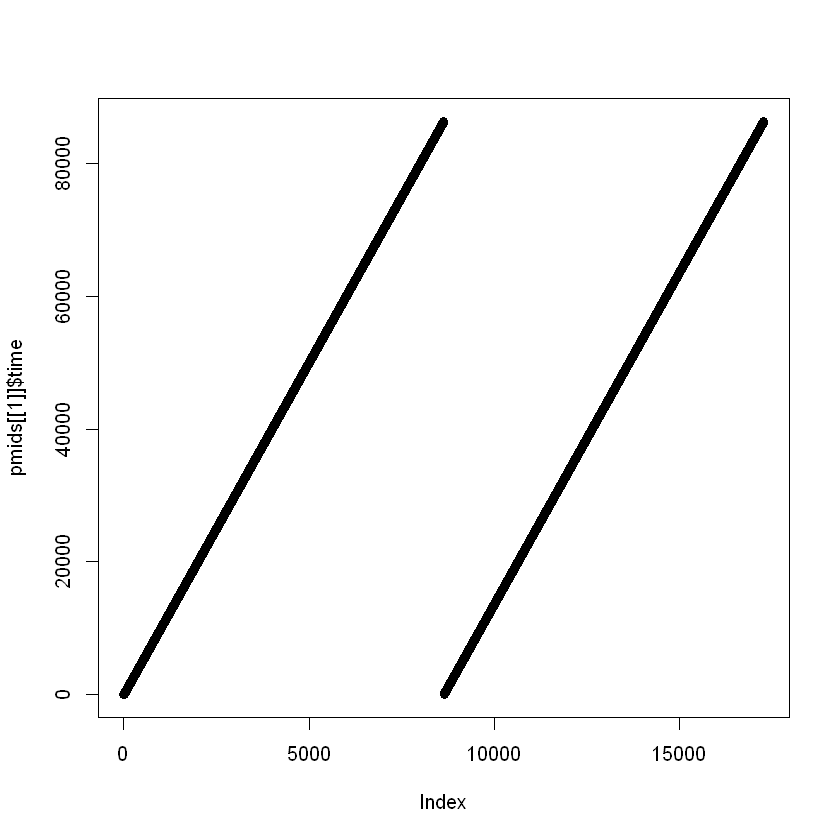

In [7]:
plot(pmids[[1]]$time)

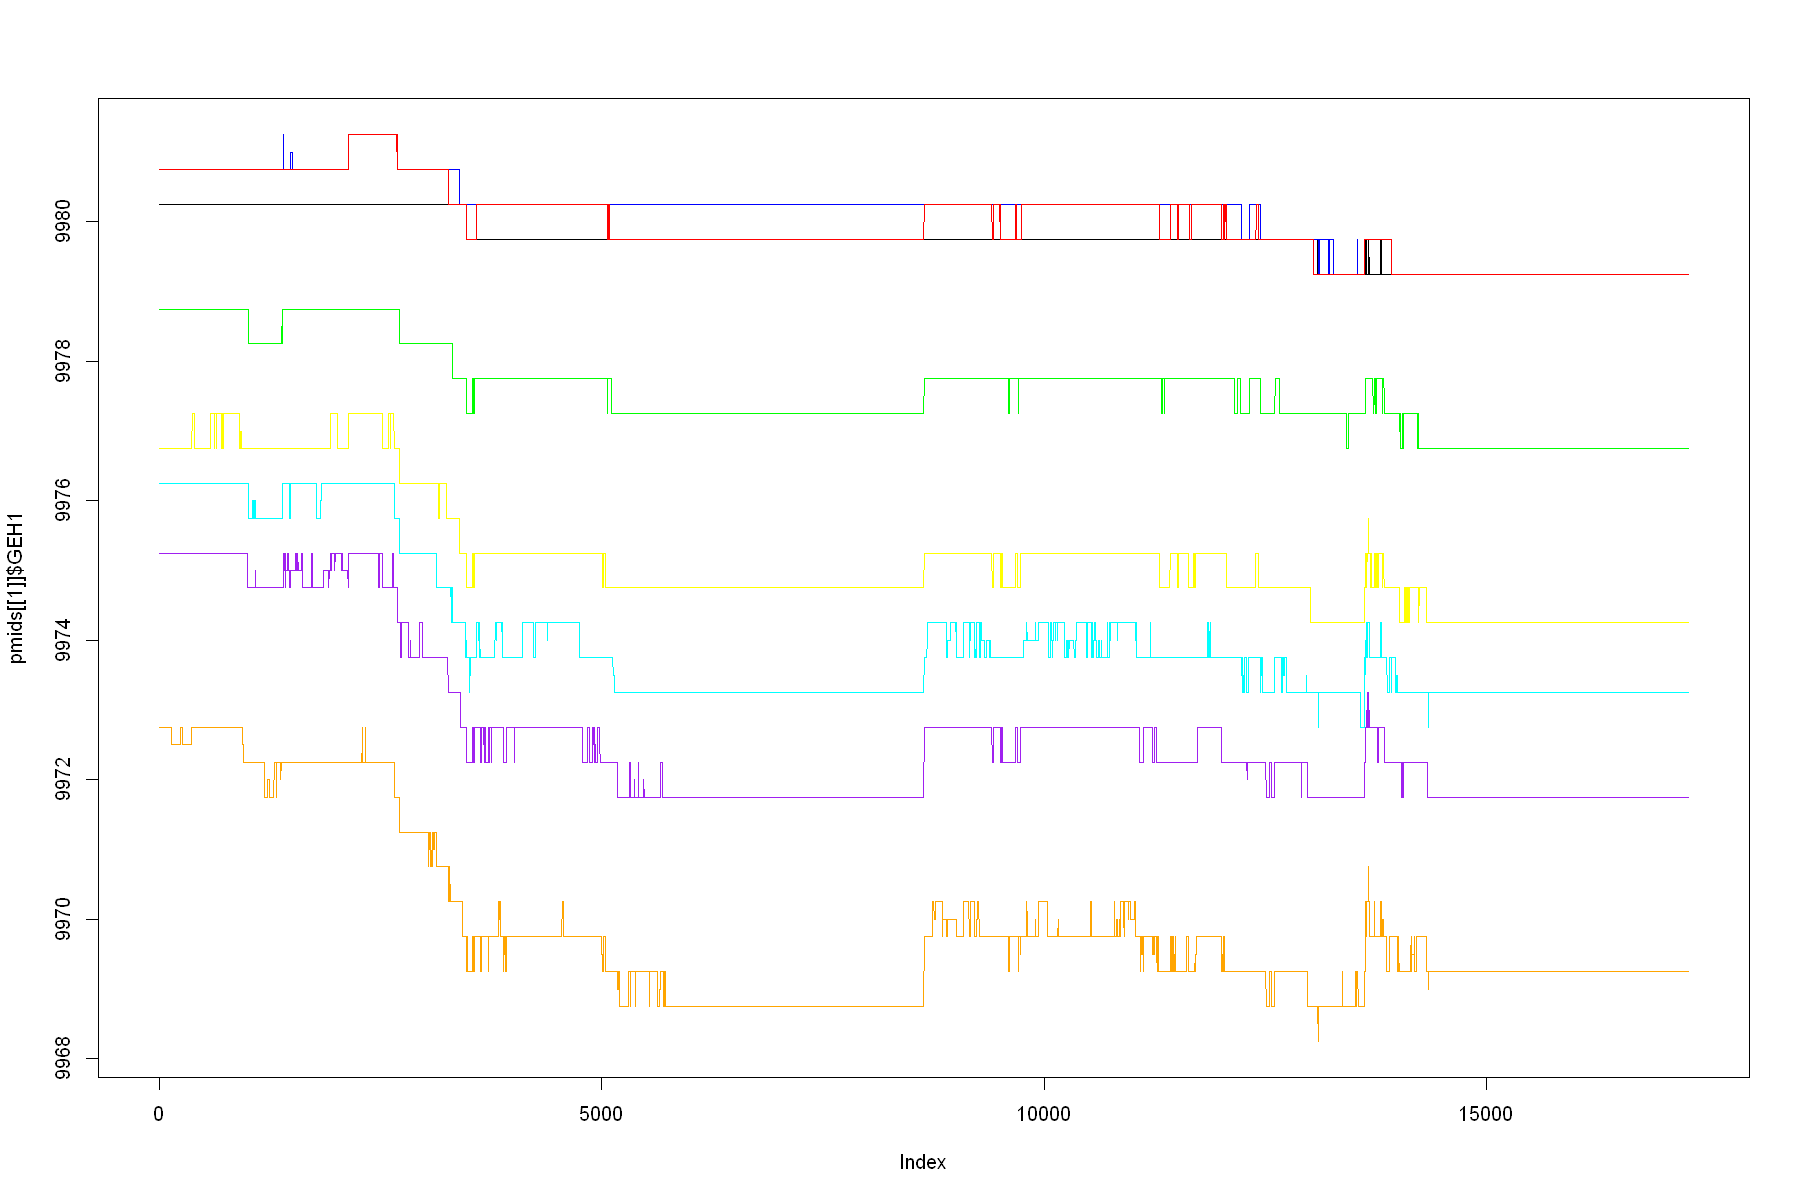

In [8]:
options(repr.plot.width=15,repr.plot.height=10)
plot(pmids[[1]]$GEH1,col="black",type="l",ylim=c(min(pmids[[1]][2:9]),max(pmids[[1]][2:9])))
lines(pmids[[1]]$GEM1,col="blue")
lines(pmids[[1]]$GEU1,col="red")
lines(pmids[[1]]$GEZ1,col="green")
lines(pmids[[1]]$GEH2,col="yellow")
lines(pmids[[1]]$GEM2,col="cyan")
lines(pmids[[1]]$GEU2,col="purple")
lines(pmids[[1]]$GEZ2,col="orange")

In [10]:
pmids = pmids.stats(pmids,"exponential",as.integer(3600/10))

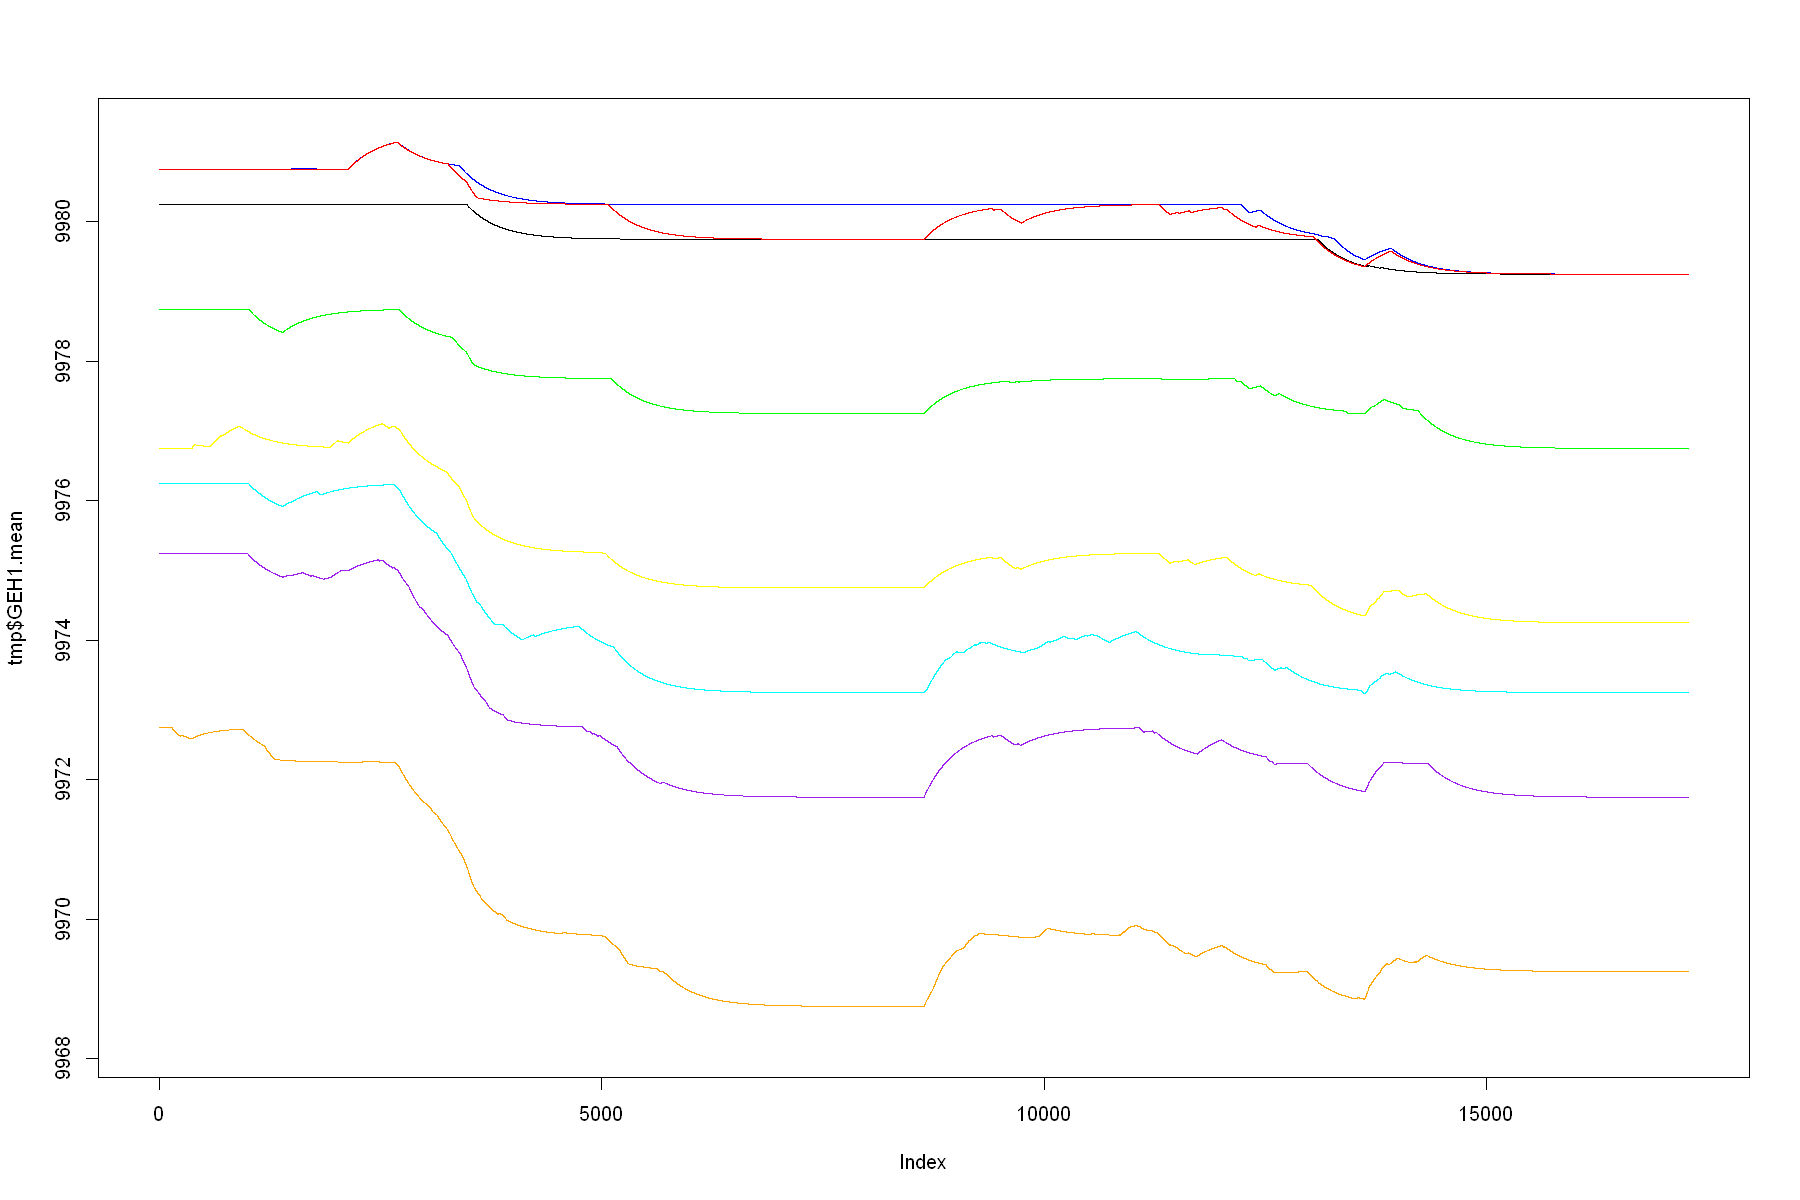

In [11]:
tmp = pmids[[1]]
options(repr.plot.width=15,repr.plot.height=10)
plot(tmp$GEH1.mean,col="black",type="l",ylim=c(min(tmp[,2:9]),max(tmp[,2:9])))
lines(tmp$GEM1.mean,col="blue")
lines(tmp$GEU1.mean,col="red")
lines(tmp$GEZ1.mean,col="green")
lines(tmp$GEH2.mean,col="yellow")
lines(tmp$GEM2.mean,col="cyan")
lines(tmp$GEU2.mean,col="purple")
lines(tmp$GEZ2.mean,col="orange")

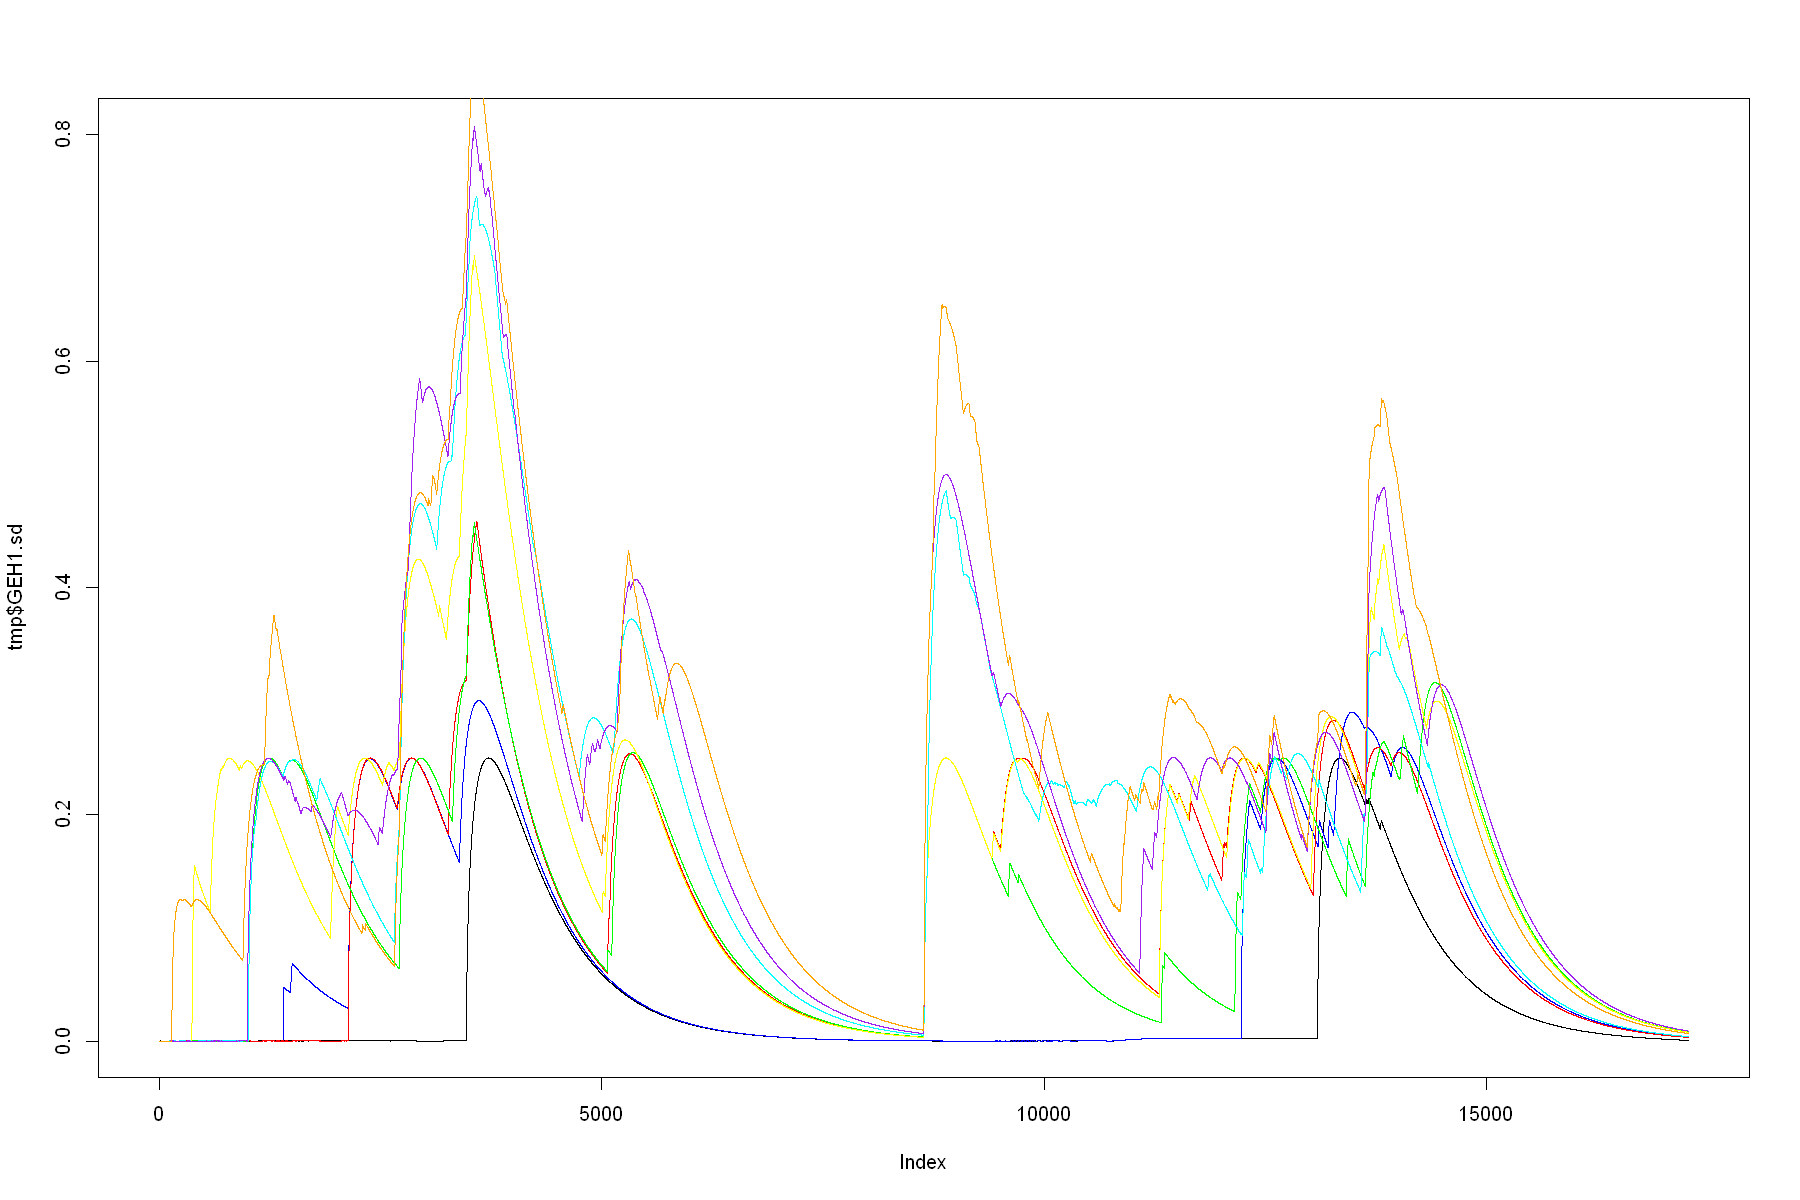

In [12]:
options(repr.plot.width=15,repr.plot.height=10)
plot(tmp$GEH1.sd,type="l",col="black",ylim=c(0,0.8))
lines(tmp$GEM1.sd,col="blue")
lines(tmp$GEU1.sd,col="red")
lines(tmp$GEZ1.sd,col="green")
lines(tmp$GEH2.sd,col="yellow")
lines(tmp$GEM2.sd,col="cyan")
lines(tmp$GEU2.sd,col="purple")
lines(tmp$GEZ2.sd,col="orange")

In [14]:
nvec = 1
pmids = pmids.preds(pmids,nvec=nvec)

In [15]:
tmp = pmids[[1]]
print(colnames(tmp[,2:9]))
print(colnames(tmp[,10:17]))
print(colnames(tmp[,18:25]))
print(colnames(tmp[,26:53]))

[1] "GEH1" "GEM1" "GEU1" "GEZ1" "GEH2" "GEM2" "GEU2" "GEZ2"
[1] "GEH1.mean" "GEM1.mean" "GEU1.mean" "GEZ1.mean" "GEH2.mean" "GEM2.mean"
[7] "GEU2.mean" "GEZ2.mean"
[1] "GEH1.sd" "GEM1.sd" "GEU1.sd" "GEZ1.sd" "GEH2.sd" "GEM2.sd" "GEU2.sd"
[8] "GEZ2.sd"
 [1] "corr.1"  "corr.2"  "corr.3"  "corr.4"  "corr.5"  "corr.6"  "corr.7" 
 [8] "corr.8"  "corr.9"  "corr.10" "corr.11" "corr.12" "corr.13" "corr.14"
[15] "corr.15" "corr.16" "corr.17" "corr.18" "corr.19" "corr.20" "corr.21"
[22] "corr.22" "corr.23" "corr.24" "corr.25" "corr.26" "corr.27" "corr.28"


In [19]:
balance.T = 60
balance.step = as.integer(balance.T/dsec)
balance.step

[1] 1

In [22]:
pmid = pmids[[1]]
sig.names = paste0(syms,".sig")

In [25]:
filter.size = 0.01 * 0.005 # 0.01 * displayed tick size
# df.pmids[[i]][,sig.name] = apply(df.pmids[[i]][,sig.name],2,function(x){ifelse(abs(x)>filter.size,x,0)})

In [26]:
head(pmids[[1]])

,time,GEH1,GEM1,GEU1,GEZ1,GEH2,GEM2,GEU2,GEZ2,GEH1.mean,...,GEU2.pred,GEZ2.pred,GEH1.sig,GEM1.sig,GEU1.sig,GEZ1.sig,GEH2.sig,GEM2.sig,GEU2.sig,GEZ2.sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,9980.25,9980.75,9980.75,9978.75,9976.75,9976.25,9975.25,9972.75,9980.25,...,9975.25,9972.75,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,10,9980.25,9980.75,9980.75,9978.75,9976.75,9976.25,9975.25,9972.75,9980.25,...,9975.25,9972.75,1.818989e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.818989e-12,0.000000e+00,0.000000e+00
3,20,9980.25,9980.75,9980.75,9978.75,9976.75,9976.25,9975.25,9972.75,9980.25,...,9975.25,9972.75,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12,0.000000e+00,0.000000e+00
4,30,9980.25,9980.75,9980.75,9978.75,9976.75,9976.25,9975.25,9972.75,9980.25,...,9975.25,9972.75,0.000000e+00,1.818989e-12,1.818989e-12,1.818989e-12,0.000000e+00,1.818989e-12,0.000000e+00,0.000000e+00
5,40,9980.25,9980.75,9980.75,9978.75,9976.75,9976.25,9975.25,9972.75,9980.25,...,9975.25,9972.75,1.818989e-12,3.637979e-12,3.637979e-12,3.637979e-12,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12
6,50,9980.25,9980.75,9980.75,9978.75,9976.75,9976.25,9975.25,9972.75,9980.25,...,9975.25,9972.75,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12,1.818989e-12
